### <font color='red'> Buzz Prediction on Twitter (Regression Part I)

Objective of this notebook:
- Applied the below regression models to the data:
    - KNN Regressor
    - Linear Regression
    - Ridge Regression
    - Lasso Regression
    - Polynomial Regression
    - SVM using Kernel 
- Used Grid Search in case the model has scaling parameter(s) to find the best scaling paramter. 
- Used cross-validation to find the average training and testing score. 
- Finally, Compared the results from above models and came out with the best regressor for this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('Twitter.data', header = None)

In [3]:
data.columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
               'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3',
                'BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1',
               'AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
               'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0',
               'ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Target']

In [4]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [5]:
data.shape

(583250, 78)

In [6]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

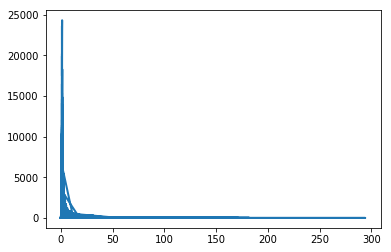

In [8]:
plt.plot(data["ADL_0"],data["NAD_0"],linewidth=2.0)
plt.show()

### Checking for data leakage

In [9]:
for i in range(len(data.columns.values) - 1):
    if data.iloc[:,i].corr(data.iloc[:,-1]) > 0.95:
        print(data.iloc[:,i].corr(data.iloc[:,-1]))

0.955329588649
0.95180905429
0.955298655736


We have checked the correlation of the target variable with the predictor variable and have seen the top 3 of them and they don't have a high correlation. Therefore none of the predictor variable is fully predicting the target varibale Buzz. Hence there is no data leakage.

(array([  5.78541000e+05,   3.25400000e+03,   8.21000000e+02,
          3.30000000e+02,   1.07000000e+02,   9.00000000e+01,
          3.60000000e+01,   2.50000000e+01,   1.80000000e+01,
          9.00000000e+00,   1.10000000e+01,   5.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([     0.        ,   2635.96666667,   5271.93333333,   7907.9       ,
         10543.86666667,  13179.83333333,  15815.8       ,  18451.76666667,
         21087.73333333,  23723.7       ,  26359.66666667,  28995.63333333,
         31631.6       ,  34267.56666667,  36903.53333333,  39539.5       ,
         42175.46666667,  44811.43333333,  47447.4       ,  50083.36666667

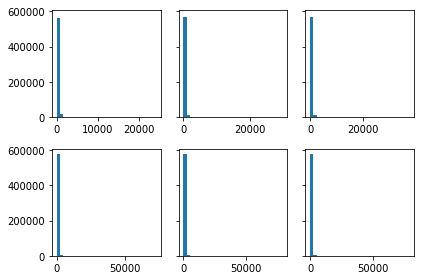

In [103]:
n_bins = 30

plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)

axs[0][0].hist(data['NCD_0'], bins=n_bins)
axs[0][1].hist(data['NCD_1'], bins=n_bins)
axs[0][2].hist(data['NCD_2'], bins=n_bins)
axs[1][0].hist(data['NCD_3'], bins=n_bins)
axs[1][1].hist(data['NCD_4'], bins=n_bins)
axs[1][2].hist(data['NCD_5'], bins=n_bins)

From the above distribution we can see that some of the features doesn't have a normal distribution. Therefore we will be using a MinMax Scaler for feature scaling for both our tasks.

In [104]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

We have taken a random sample of data containing only 10% of the total observations. Considering this as the entire dataset, we are splitting the dataset into train and test.

In [106]:
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [107]:
from sklearn.model_selection import GridSearchCV

# Regression Models

### 1. KNN Regression Model

In [108]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}
print("Parameter grid for KNN: {}".format(param_grid))
grid_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, n_jobs = -1)

Parameter grid for KNN: {'n_neighbors': [1, 5, 10, 15, 20]}


In [109]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
cv_results = pd.DataFrame.from_dict(grid_knn.cv_results_)
cv_results[['param_n_neighbors','mean_train_score','mean_test_score']]

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.887452
1,5,0.949692,0.917054
2,10,0.926921,0.906783
3,15,0.909295,0.896558
4,20,0.894787,0.885592


Text(0,0.5,'R-square')

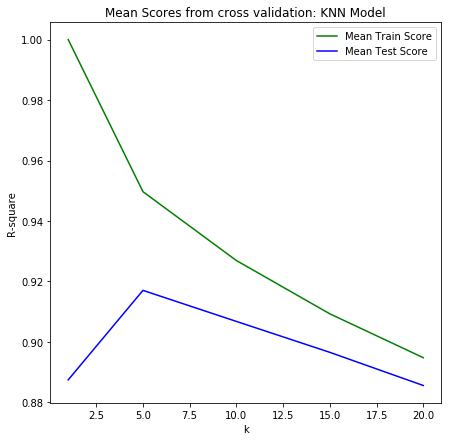

In [111]:
x_axis = cv_results['param_n_neighbors']

plt.figure(figsize=(7,7))
plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Mean Scores from cross validation: KNN Model')
plt.xlabel('k')
plt.ylabel('R-square')

From the figure we can see that 5 is the best number of neighbors. The same results we have obtained from the grid search.

In [112]:
print("Best cross-validation score: {:.4f}".format(grid_knn.best_score_))
print('Best number of neighbors:',grid_knn.best_params_)
print("Training Score: {:.4f}".format(grid_knn.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_knn.score(X_test, y_test)))

Best cross-validation score: 0.9171
Best number of neighbors: {'n_neighbors': 5}
Training Score: 0.9526
Testing Score: 0.8819


The above test score is for the hold out sample that was created upon train_test_split.

In [162]:
report_table = [['KNN Regressor', 'k = 5', grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test)]]

### 2. Linear Regression Model

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)

train_score = cross_val_score(lreg, X_train, y_train, cv=5)
test_score = lreg.score(X_test,y_test)

In [115]:
print("Cross-validation scores: {}".format(train_score))

Cross-validation scores: [ 0.93621521  0.95368436  0.95476321  0.96069183  0.97424356]


In [116]:
print("Training Score: {:.4f}".format(train_score.mean()))
print("Testing Score: {:.4f}" .format(test_score))

Training Score: 0.9559
Testing Score: 0.9013


In [163]:
report_table = report_table + [['Linear Regression', '-', train_score.mean(), test_score]]

### 3. SGD Regression Model

In [118]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(learning_rate = 'optimal',random_state = 0)
param_grid = {'max_iter':[100, 1000, 10000], 'penalty':['l1','l2']}
print("Parameter grid for SGD Regression: {}".format(param_grid))

grid_sgd = GridSearchCV(sgd, param_grid = param_grid, cv = 5, n_jobs = -1)

Parameter grid for SGD Regression: {'max_iter': [100, 1000, 10000], 'penalty': ['l1', 'l2']}


In [119]:
grid_sgd.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_iter': [100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [120]:
cv_results = pd.DataFrame.from_dict(grid_sgd.cv_results_)
cv_results[['param_max_iter','param_penalty','mean_train_score','mean_test_score']]

,param_max_iter,param_penalty,mean_train_score,mean_test_score
0,100,l1,-4.789140e+14,-8.631630e+14
1,100,l2,-7.377405e+08,-8.468580e+08
2,1000,l1,-1.028395e+14,-2.040936e+14
3,1000,l2,-3.494430e+06,-4.207825e+06
4,10000,l1,-4.261589e+13,-6.822646e+13
5,10000,l2,-2.077893e+04,-2.526665e+04


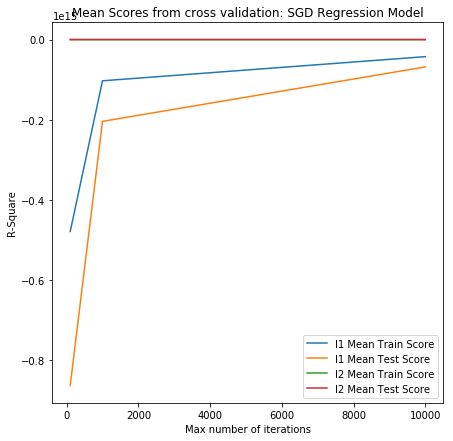

In [121]:
x_axis = param_grid['max_iter']

plt.figure(figsize=(7,7))
l1_train = cv_results[cv_results['param_penalty']=='l1']['mean_train_score']
l1_test = cv_results[cv_results['param_penalty']=='l1']['mean_test_score']
l2_train = cv_results[cv_results['param_penalty']=='l2']['mean_train_score']
l2_test = cv_results[cv_results['param_penalty']=='l2']['mean_test_score']

plt.plot(x_axis, l1_train , label = 'l1 Mean Train Score')
plt.plot(x_axis, l1_test , label = 'l1 Mean Test Score')
plt.plot(x_axis, l2_train , label = 'l2 Mean Train Score')
plt.plot(x_axis, l2_test , label = 'l2 Mean Test Score')
plt.xlabel('Max number of iterations')
plt.ylabel('R-Square')
plt.title('Mean Scores from cross validation: SGD Regression Model')
plt.legend()

In [122]:
print("Best cross-validation score: {:.4f}".format(grid_sgd.best_score_))
print('Best parameters for SGD Regression:',grid_sgd.best_params_)
print("Training Score: {:.4f}".format(grid_sgd.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_sgd.score(X_test, y_test)))

Best cross-validation score: -25266.6513
Best parameters for SGD Regression: {'max_iter': 10000, 'penalty': 'l2'}
Training Score: -12160.1070
Testing Score: -16884.7923


In [164]:
report_table = report_table + [['SGD Regression', 'max_iter = 10000 and penalty = l2', grid_sgd.score(X_train, y_train), grid_sgd.score(X_test, y_test)]]

### 4. Ridge Regression model

In [123]:
from  sklearn.linear_model import Ridge

ridge = Ridge(random_state = 0)
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100]}
print("Parameter grid for Ridge Regression: {}".format(param_grid))

grid_ridge = GridSearchCV(ridge, param_grid = param_grid, cv = 5, n_jobs = -1)

Parameter grid for Ridge Regression: {'alpha': [0.01, 0.1, 1, 10, 100]}


In [124]:
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
cv_results = pd.DataFrame.from_dict(grid_ridge.cv_results_)
cv_results[['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.960939,0.955882
1,0.1,0.959913,0.955310
2,1,0.953967,0.949272
3,10,0.930593,0.926008
4,100,0.879784,0.876659


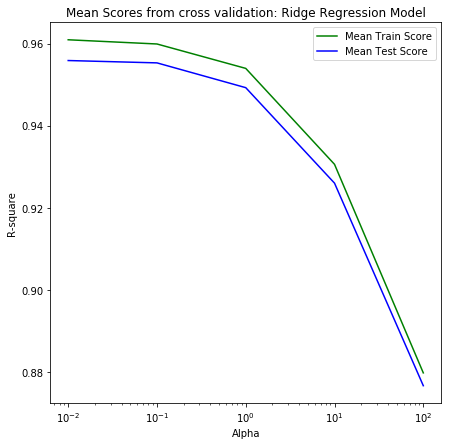

In [126]:
x_axis = cv_results['param_alpha']

plt.figure(figsize=(7,7))
plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Mean Scores from cross validation: Ridge Regression Model')
plt.xlabel('Alpha')
plt.ylabel('R-square')
plt.xscale('log')

In [127]:
print("Best cross-validation score: {:.4f}".format(grid_ridge.best_score_))
print('Best alpha:',grid_ridge.best_params_)
print("Training Score: {:.4f}".format(grid_ridge.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_ridge.score(X_test, y_test)))

Best cross-validation score: 0.9559
Best alpha: {'alpha': 0.01}
Training Score: 0.9607
Testing Score: 0.9011


In [168]:
report_table = report_table + [['Ridge Regression', 'alpha = 0.01', grid_ridge.score(X_train, y_train), grid_ridge.score(X_test, y_test)]]

### 5. Lasso Regression Model

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state = 0)
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100]}
print("Parameter grid for Lasso Regression: {}".format(param_grid))

grid_lasso = GridSearchCV(lasso, param_grid = param_grid, cv = 5, n_jobs = -1)

Parameter grid for Lasso Regression: {'alpha': [0.01, 0.1, 1, 10, 100]}


In [129]:
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [130]:
cv_results = pd.DataFrame.from_dict(grid_lasso.cv_results_)
cv_results[['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.960074,0.955446
1,0.1,0.954746,0.951587
2,1,0.939751,0.936958
3,10,0.519950,0.518090
4,100,0.000000,-0.000047


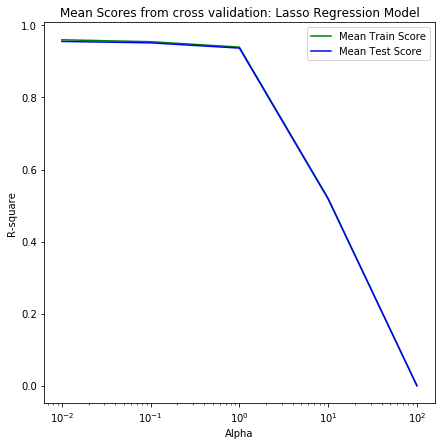

In [131]:
x_axis = cv_results['param_alpha']

plt.figure(figsize=(7,7))
plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Mean Scores from cross validation: Lasso Regression Model')
plt.xlabel('Alpha')
plt.ylabel('R-square')
plt.xscale('log')

In [132]:
print("Best cross-validation score: {:.4f}".format(grid_lasso.best_score_))
print('Best alpha:',grid_lasso.best_params_)
print("Training Score: {:.4f}".format(grid_lasso.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_lasso.score(X_test, y_test)))

Best cross-validation score: 0.9554
Best alpha: {'alpha': 0.01}
Training Score: 0.9599
Testing Score: 0.8999


In [172]:
report_table = report_table + [['Lasso Regression', 'alpha = 0.01', grid_lasso.score(X_train, y_train), grid_lasso.score(X_test, y_test)]]

### 6. Polynomial Regression

In [134]:
from sklearn.preprocessing import PolynomialFeatures
train_scores_list = []
test_scores_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    train_cv_scores = cross_val_score(lreg, X_train_poly, y_train, cv=5)
    train_scores_list.append(train_cv_scores.mean())
    lreg.fit(X_train_poly,y_train)
    test_scores = lreg.score(X_test_poly,y_test)
    test_scores_list.append(test_scores)

In [135]:
print(train_scores_list)
print(test_scores_list)

[0.95591963192169715, -1.6077407096027296]
[0.9012963894278061, -0.97494807913258819]


This is also giving a negative test scores which is a very poor performance. Hence we have not included this model 
in our report.

### 7. Support Vector Regression

##### Linear SVR

In [136]:
from sklearn.svm import SVR

svr_linear = SVR(kernel = 'linear') 
param_grid = {'C':[0.01, 0.1, 1, 10]}
print("Parameter grid for Linear SVR: {}".format(param_grid))

grid_svrLinear = GridSearchCV(svr_linear, param_grid = param_grid, cv = 5, n_jobs = -1)

Parameter grid for Linear SVR: {'C': [0.01, 0.1, 1, 10]}


In [137]:
grid_svrLinear.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [138]:
cv_results = pd.DataFrame.from_dict(grid_svrLinear.cv_results_)
cv_results[['param_C','mean_train_score','mean_test_score']]

,param_C,mean_train_score,mean_test_score
0,0.01,-0.052217,-0.053384
1,0.1,0.017256,0.016347
2,1,0.500716,0.500730
3,10,0.835431,0.834934


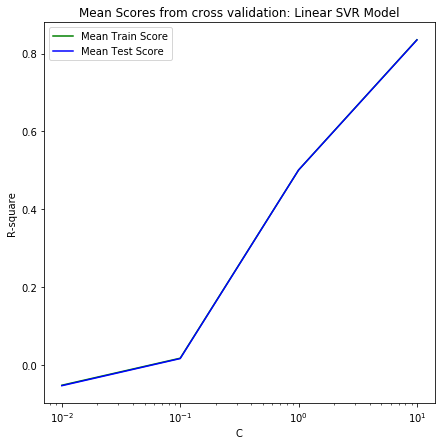

In [139]:
x_axis = cv_results['param_C']

plt.figure(figsize=(7,7))

plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Mean Scores from cross validation: Linear SVR Model')
plt.xlabel('C')
plt.ylabel('R-square')
plt.xscale('log')

In [140]:
print("Best cross-validation score: {:.4f}".format(grid_svrLinear.best_score_))
print('Best penalty term:',grid_svrLinear.best_params_)
print("Training Score: {:.4f}".format(grid_svrLinear.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_svrLinear.score(X_test, y_test)))

Best cross-validation score: 0.8349
Best penalty term: {'C': 10}
Training Score: 0.8442
Testing Score: 0.7982


In [173]:
report_table = report_table + [['Linear SVR', 'C = 10', grid_svrLinear.score(X_train, y_train), grid_svrLinear.score(X_test, y_test)]]

##### Kernelized SVR

As it is taking a lot of time to run the model for the 10% of the random data, we have taken a 1% sample of data to run just for the kernelized SVR and Polynomial SVR.

In [142]:
from sklearn.model_selection import train_test_split
_, sample_data_svr, _, sample_target_svr = train_test_split(X, y, shuffle = True, test_size = 0.01)

In [143]:
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(sample_data_svr, sample_target_svr, random_state = 0)

scaler = StandardScaler()
X_train_svr_scaled = scaler.fit_transform(X_train_svr)
X_test_svr_scaled = scaler.transform(X_test_svr)

In [144]:
svr_rbf = SVR(kernel = 'rbf') 
param_grid = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.01,0.1,1,10]}
print("Parameter grid for RBF SVR: {}".format(param_grid))

grid_svrRbf = GridSearchCV(svr_rbf, param_grid = param_grid, cv = 5, n_jobs = -1)

Parameter grid for RBF SVR: {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}


In [145]:
grid_svrRbf.fit(X_train_svr_scaled, y_train_svr)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [146]:
cv_results = pd.DataFrame.from_dict(grid_svrRbf.cv_results_)
cv_results[['param_C','param_gamma','mean_train_score','mean_test_score']]

,param_C,param_gamma,mean_train_score,mean_test_score
0,0.01,0.01,-0.067342,-0.073932
1,0.01,0.1,-0.067769,-0.074474
2,0.01,1,-0.066966,-0.073585
3,0.01,10,-0.067791,-0.074543
4,0.1,0.01,-0.056411,-0.061021
5,0.1,0.1,-0.061918,-0.067730
6,0.1,1,-0.057247,-0.062528
7,0.1,10,-0.061410,-0.067344
8,1,0.01,0.045440,0.056946
9,1,0.1,-0.039425,-0.042197


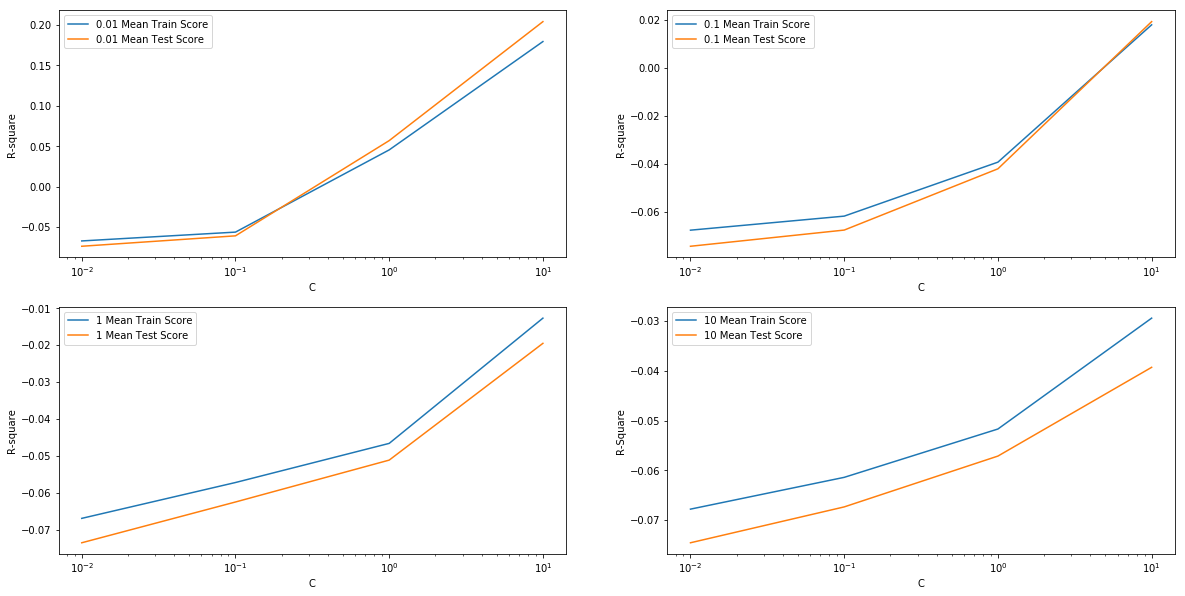

In [147]:
x_axis = param_grid['C']

l1_train = cv_results[cv_results['param_gamma']==0.01]['mean_train_score']
l1_test = cv_results[cv_results['param_gamma']==0.01]['mean_test_score']
l2_train = cv_results[cv_results['param_gamma']==0.1]['mean_train_score']
l2_test = cv_results[cv_results['param_gamma']==0.1]['mean_test_score']
l3_train = cv_results[cv_results['param_gamma']==1]['mean_train_score']
l3_test = cv_results[cv_results['param_gamma']==1]['mean_test_score']
l4_train = cv_results[cv_results['param_gamma']==10]['mean_train_score']
l4_test = cv_results[cv_results['param_gamma']==10]['mean_test_score']

plt.figure(figsize=(20,10))
plt.title('Mean Scores from cross validation: RBF SVR Model')

plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.plot(x_axis, l1_train , label = '0.01 Mean Train Score')
plt.plot(x_axis, l1_test , label = '0.01 Mean Test Score')
plt.xlabel('C')
plt.ylabel('R-square')
plt.legend()
plt.xscale('log')

plt.subplot(2, 2, 2)
plt.plot(x_axis, l2_train , label = '0.1 Mean Train Score')
plt.plot(x_axis, l2_test , label = '0.1 Mean Test Score')
plt.xlabel('C')
plt.ylabel('R-square')
plt.legend()
plt.xscale('log')

plt.subplot(2,2,3)
plt.plot(x_axis, l3_train , label = '1 Mean Train Score')
plt.plot(x_axis, l3_test , label = '1 Mean Test Score')
plt.xlabel('C')
plt.ylabel('R-square')
plt.legend()
plt.xscale('log')

plt.subplot(2,2,4)
plt.plot(x_axis, l4_train , label = '10 Mean Train Score')
plt.plot(x_axis, l4_test , label = '10 Mean Test Score')
plt.xlabel('C')
plt.ylabel('R-Square')
plt.legend()
plt.xscale('log')

In [148]:
print("Best cross-validation score: {:.4f}".format(grid_svrRbf.best_score_))
print('Best C and gamma:',grid_svrRbf.best_params_)
print("Training Score: {:.4f}".format(grid_svrRbf.score(X_train_svr_scaled, y_train_svr)))
print("Testing Score: {:.4f}".format(grid_svrRbf.score(X_test_svr_scaled, y_test_svr)))

Best cross-validation score: 0.2043
Best C and gamma: {'C': 10, 'gamma': 0.01}
Training Score: 0.1893
Testing Score: 0.4582


In [174]:
report_table = report_table + [['RBF SVR', 'C = 10 and gamma = 0.01', grid_svrRbf.score(X_train_svr_scaled, y_train_svr), grid_svrRbf.score(X_test_svr_scaled, y_test_svr)]]

##### Poly SVR

In [150]:
svr_poly = SVR(degree = 3) 
param_grid = {'C':[0.01, 0.1, 1, 10]}

grid_svrPoly = GridSearchCV(svr_poly, param_grid = param_grid, cv = 5, n_jobs = -1)

In [151]:
grid_svrPoly.fit(X_train_svr_scaled, y_train_svr)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [152]:
cv_results = pd.DataFrame.from_dict(grid_svrPoly.cv_results_)
cv_results[['param_C','mean_train_score','mean_test_score']]

,param_C,mean_train_score,mean_test_score
0,0.01,-0.067436,-0.074035
1,0.1,-0.057191,-0.061939
2,1,0.035292,0.045443
3,10,0.159483,0.182361


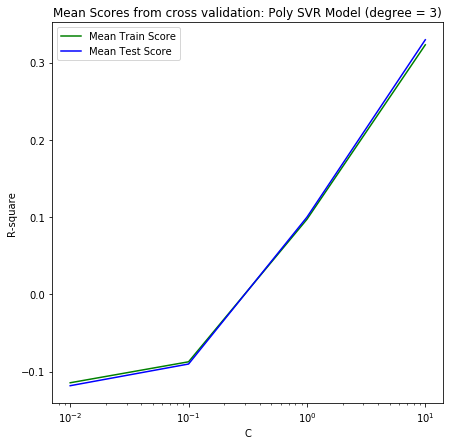

In [79]:
x_axis = cv_results['param_C']

plt.figure(figsize=(7,7))
plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Mean Scores from cross validation: Poly SVR Model (degree = 3)')
plt.xlabel('C')
plt.ylabel('R-square')
plt.xscale('log')

In [153]:
print("Best cross-validation score: {:.2f}".format(grid_svrPoly.best_score_))
print('Best C:',grid_svrPoly.best_params_)
print("Training Score: {:.4f}".format(grid_svrPoly.score(X_train_svr_scaled, y_train_svr)))
print("Testing Score: {:.4f}".format(grid_svrPoly.score(X_test_svr_scaled, y_test_svr)))

Best cross-validation score: 0.18
Best C: {'C': 10}
Training Score: 0.1703
Testing Score: 0.4269


In [175]:
report_table = report_table + [['Poly SVR', 'C = 10', grid_svrPoly.score(X_train_svr_scaled, y_train_svr), grid_svrPoly.score(X_test_svr_scaled, y_test_svr)]]

In [176]:
report_table

[['KNN Regressor', 'k = 5', 0.95258036462468665, 0.88194106588863097],
 ['Linear Regression', '-', 0.95591963192169727, 0.90129638942780699],
 ['SGD Regression',
  'max_iter = 10000 and penalty = l2',
  -12160.107037952688,
  -16884.792328240081],
 ['Ridge Regression',
  'alpha = 0.01',
  0.96074494557584711,
  0.90110715564709398],
 ['Lasso Regression',
  'alpha = 0.01',
  0.95988724069334075,
  0.89991991468781596],
 ['Linear SVR', 'C = 10', 0.84424226264950131, 0.79816208765628394],
 ['RBF SVR',
  'C = 10 and gamma = 0.01',
  0.18930289972271264,
  0.45817544511148212],
 ['Poly SVR', 'C = 10', 0.17028927688273587, 0.42693652472676058]]

In [179]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])

In [180]:
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy
Model name,,,,
KNN Regressor,KNN Regressor,k = 5,0.952580,0.881941
Linear Regression,Linear Regression,-,0.955920,0.901296
SGD Regression,SGD Regression,max_iter = 10000 and penalty = l2,-12160.107038,-16884.792328
Ridge Regression,Ridge Regression,alpha = 0.01,0.960745,0.901107
Lasso Regression,Lasso Regression,alpha = 0.01,0.959887,0.899920
Linear SVR,Linear SVR,C = 10,0.844242,0.798162
RBF SVR,RBF SVR,C = 10 and gamma = 0.01,0.189303,0.458175
Poly SVR,Poly SVR,C = 10,0.170289,0.426937


Out of all the above models, Linear regression and Ridge Regression have approximately equal test accuracy of 0.9012. But ridge regression has the highest accuracy on train. Hence, we have ran the Ridge regression with alpha = 0.01 on the entire dataset.

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_whole_scale = scaler.fit_transform(X_train_whole)
X_test_whole_scale = scaler.transform(X_test_whole)

ridge = Ridge(alpha = 0.01)
ridge.fit(X_train_whole_scale,y_train_whole)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [186]:
print("Training Score of the best model: {:.4f}".format(ridge.score(X_train_whole_scale, y_train_whole)))
print("Testing Score of the best model: {:.4f}".format(ridge.score(X_test_whole_scale, y_test_whole)))

Training Score of the best model: 0.9330
Testing Score of the best model: 0.9433


In [187]:
y_predict = ridge.predict(X_test_whole_scale)

In [188]:
from sklearn.metrics import r2_score
r2_score(y_test_whole, y_predict)

0.94328318231640862

Ridge Regression is the best regression best for this dataset.